In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
import matplotlib.font_manager # matplotlib 폰트 처리
plt.rc('font', family='Malgun Gothic')

In [3]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [11]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
'''
0: sepalLength (꽃받침의 길이)
1: sepalWidth (꽃받침의 너비)
2: PetalLength(꽃잎의 길이)
3: PetalWidth(꽃잎의 너비)
4: 꽃의 종류 (setosa/virginica/versicolor)
'''
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# versicolor = 1
# setosa = -1

In [21]:
y = df.iloc[0:100,4].values
# np.where 이 Iris-setosa 면 -1, 아니면 1
y = np.where(y == 'Iris-setosa', -1, 1)

In [25]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
# X = df에서 추출.. 0,100 중에 0:꽃받침 길이, 2: 꽃잎의 길이
X = df.iloc[0:100, [0, 2]].values

In [35]:
X[:50, 1]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

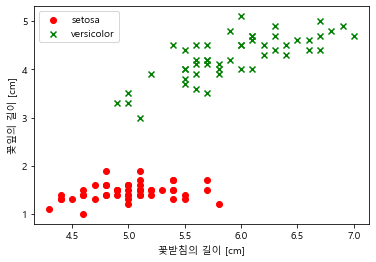

In [42]:
# 산점도 그리기  (두 변수가 어떤 관계가 있는지, 이를테면 나이에 따라서 나오는 교통사고 비율.. 80대가 20대보다 교통사고가 높을 수 있음)

# plt.scatter: X에 지금 값이 2개(꽃받침 길이, 꽃잎 길이) 들어있어서 각각 0, 1로 구분하고, 꽃받침과 꽃잎의 관계를 보여주기....
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:, 0], X[50:, 1], color="green", marker="x", label="versicolor")
plt.xlabel('꽃받침의 길이 [cm]')
plt.ylabel('꽃잎의 길이 [cm]')
plt.legend(loc='upper left')
plt.show()


### 결과를 정리해보자.

데이터 상에서....
Setosa의 경우 꽃받침의 길이(x)가 6.0 cm까지 있고, 꽃잎의 길이(y)는 최대 2cm 정도로 작은 편이다.

Versicolor 의 경우 꽃받침의 길이(x)가 대부분 크고 (4.6\~7 - 7.0), 꽃잎의 길이(y)도 긴 편이다(3~5)


In [118]:
# 이제 퍼셉트론 분류기가 꽃을 분류해줄 것임..
ppn = Perceptron(eta=0.1, n_iter=10) # 학습률 0.1 로 10번 학습함.
ppn.fit(X, y)

Text(0, 0.5, '에포크 대비 잘못 분류된 오차')

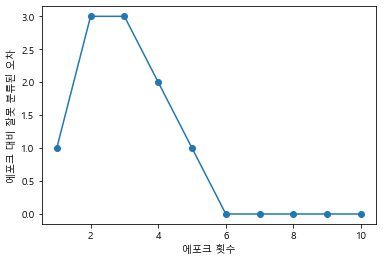

In [119]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel('에포크 횟수')
plt.ylabel('에포크 대비 잘못 분류된 오차')

# 이 에포크가 너무 많으면, overfitting 이 발생함.
# Overfitting 이라는 것은 모델이 훈련 데이터셋을 일반화할 수 없을 정도로 너무 근접하게 적합한 것을 말함.. (그렇게 이해하는 것으로..)
# plot_decision_regions은 10번 iteration 시킨 것이고, 4번까지는 줄이 안그이는데.. 학습을 할 수록 decision boundry 가 diagonal 에서 Horizontal 으로 그여질 것이며, 오히려 오차가 증가하게 됨./
# https://aws.amazon.com/ko/what-is/overfitting/ 참고...

In [120]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵 설정 (s: 사각형 / x: 곱셈기호, o: 원, ^: 삼각형, v: 뒤집힌 삼각형)
    # ListedColorMap: 인자로 주어진 색상을 그래프상에 표시하기 위한 객체, red, blue, ~~~ cyan 까지 매핑시킴..
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red', 'blue', 'lightgreen','gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    # 트레이닝 데이터의 꽃받침 길이(0)과 꽃잎 길이(1)의 최솟값 -1, 최댓값 +1
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 산점도 그리기
    for index, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[index], marker=markers[index], label=cl, edgecolor='black')

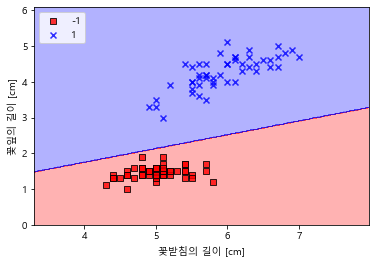

In [121]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('꽃받침의 길이 [cm]')
plt.ylabel('꽃잎의 길이 [cm]')
plt.legend(loc='upper left')
plt.show()